# **Real Estate - EDA**


# **Table of Contents**
* [1.Introduction](#1)
* [2.Import Libraries](#2)
* [3.Load](#3)
* [4.Exploratory Data Analysis](#4)
* [5.Data Preparation](#5)
  * [Handling the missing values](#6)
  * [Convert type of attributes](#7)
  * [Preprocessing Data](#8)
* [6. Report: Pandas profiling](#6)
* [7. Export](#7)


## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="1"></a> <br>
# **1. Introduction**

The dataset we'll be analyzing is the dataset which is scrapped from Immoweb.be in Belgium. It shows the information of each house and appartement to sale. This dataset has 52.077 rows and 20 columns.

#### **Attributes:**
The metadata of the columns:

* **"locality":** Postal code of the house/apartment.
* **"type_of_property":** Type of property (house or apartment).
* **"subtype_of_property":** Specific subtype of the property (e.g., house/villa/farmhouse/...).
* **"price":** Price of the property (euros).
* **"type_of_sale":** Type of sale (e.g., "for sale").
* **"number_of_rooms":** Number of rooms in the property.
* **"house_area":** Area of the house/apartment.
* **"fully_equipped_kitchen":** Boolean field indicating if the property has a fully equipped kitchen (1 for yes, 0 for no).
* **"open_fire":** Boolean field indicating if the property has an open fire (1 for yes, 0 for no).
* **"terrace":** Boolean field indicating if the property has a terrace (1 for yes, 0 for no).
* **"terrace_area":** Area of the terrace.
* **"garden":** Boolean field indicating if the property has a garden (1 for yes, 0 for no).
* **"garden_area":** Area of the garden.
* **"surface_of_the_land":** Surface area of the land.
* **"surface_of_the_plot_of_land":** Surface area of the plot of land.
* **"number_of_facades":** Number of facades of the property.
* **"swimming_pool":** Boolean field indicating if the property has a swimming pool (1 for yes, 0 for no).
* **"state_of_the_building":** State of the building (as new/good/to be done up/to renovate/just renovated/to restore).
* **"construction_year":** Year of construction.


But in this dataset, we don't have the information related longitude and lattitude of each city. So we use also the [zipcode data of Belgium](https://github.com/kaiyungtan/Real-Estate-data-analysis/tree/master/data/raw). 

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="2"></a> <br>
# **2. Imports**

In [1]:
# Load data libraries
import pandas as pd
import numpy as np
from scipy.stats import boxcox

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.style as style
import matplotlib.gridspec as gridspec

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="3"></a> <br>
# **3. Load Data**

In [2]:
# First, let's load the data
df = pd.read_csv("../data/clean/belgium_real_estate.csv")

df.head()

,postal_code,type_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building,city_name,lattitude,longitude
0,1050,0,340000,6,203,1,0,1,0,95,2,0,to be done up,Ixelles,4.381571,50.822285
1,1050,0,520000,4,200,0,0,0,0,69,2,0,to renovate,Ixelles,4.381571,50.822285
2,1050,0,599000,4,160,1,0,1,1,100,2,0,to be done up,Ixelles,4.381571,50.822285
3,1050,0,599000,3,160,1,0,1,1,130,2,0,good,Ixelles,4.381571,50.822285
4,1050,0,575000,3,171,0,0,0,0,46,2,0,just renovated,Ixelles,4.381571,50.822285


In [3]:
df.shape

(41528, 16)

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

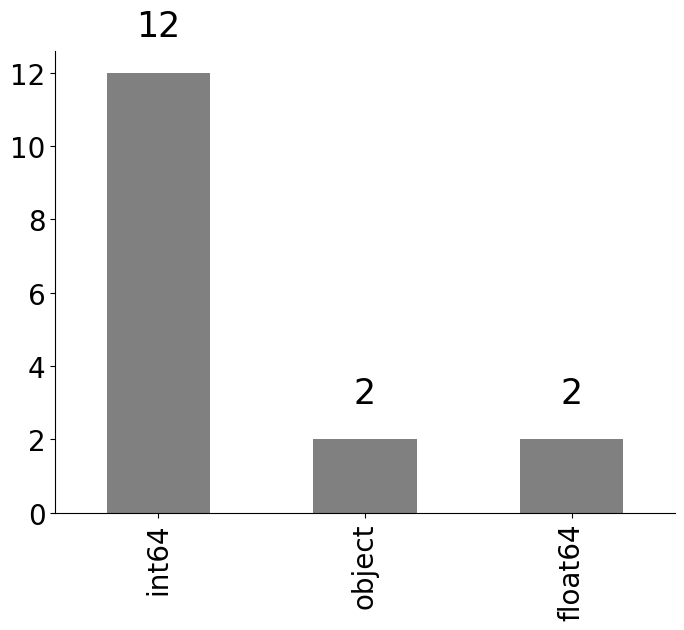

In [4]:
plt.figure(figsize=(8, 6))
ax = df.dtypes.value_counts().plot(kind="bar", grid=False, fontsize=20, color="grey")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.0, height + 1, height, ha="center", size=25)
sns.despine()

Observation:

There are 17 numerical features and 6 object (string) types. Among the numeric features, 6 are int types and 11  are float types. 

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<a id="4.3"></a> 
### **Check target**

The problem is a regression problem. Therefore, we analyze the distribution of the target and check whether there is necessary preprocessing based on this. If it is a classification problem We need to check target imbalance.

In [33]:
def plotting_3_chart(df, feature):
    style.use("fivethirtyeight")

    fig = plt.figure(
        constrained_layout=True, figsize=(15, 8)
    )  # constrained_layout:auto adjust object placement.
    grid = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)

    # Histogram
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title("Histogram")
    sns.histplot(df[feature], kde=True, ax=ax1, stat="density")
    ax1.lines[0].set_color("blue")
    # Add vertical lines for mean, median, and mode
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    mode_val = df[feature].mode().values[0]

    ax1.axvline(mean_val, color="red", linestyle="--", label="Mean")
    ax1.axvline(median_val, color="orange", linestyle="--", label="Median")
    ax1.axvline(mode_val, color="black", linestyle="--", label="Mode")
    plt.legend()

    # Probability Plot
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title("Probability Plot")
    stats.probplot(df.loc[:, feature], plot=ax2)

    # Box Plot
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title("Box Plot")
    sns.boxplot(df.loc[:, feature], orient="v", ax=ax3)

The target variable : Distribution of Price

/home/thiphan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness: 1.362451
Kurtosis: 1.885403
Mean: 315388 - Median: 275000 - Mode: 249000


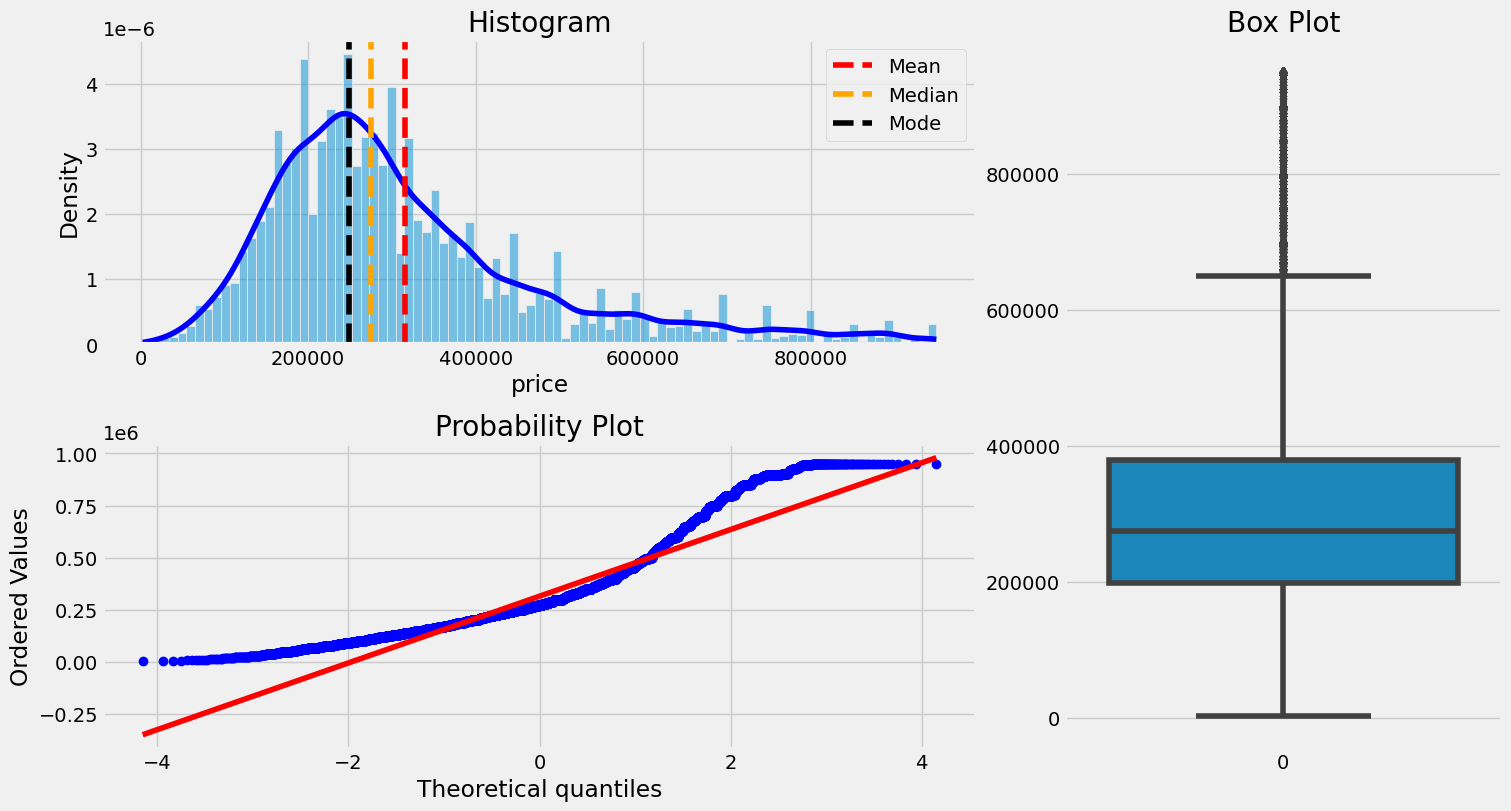

In [34]:
plotting_3_chart(df, "price")
# skewness and kurtosis
print("Skewness: %f" % df["price"].skew())
print("Kurtosis: %f" % df["price"].kurt())

mean = df["price"].mean()
median = df["price"].median()
mode = df["price"].mode()[0]

mean = round(mean)
median = round(median)
mode = round(mode)

print(f"Mean: {round(mean)} - Median: {round(median)} - Mode: {round(mode)}")

Skewness and kurtosis are statistical measures that provide insights into the shape of a distribution.

* Skewness:

Skewness measures the asymmetry of a probability distribution. A skewness value of 0 indicates a perfectly symmetrical distribution.
If skewness is positive, the distribution is skewed to the right (tail on the right), indicating that the data has a longer right tail.
If skewness is negative, the distribution is skewed to the left (tail on the left), indicating that the data has a longer left tail.
In our case, a positive skewness of 1.381479 suggests that the distribution is right-skewed, meaning there is a longer right tail.

* Kurtosis:

Kurtosis measures the "tailedness" of a distribution. A kurtosis value of 3 is considered normal, called mesokurtic. If kurtosis is less than 3, the distribution is platykurtic (light-tailed), and if greater than 3, it is leptokurtic (heavy-tailed).
Positive kurtosis indicates a distribution with heavier tails and a sharper peak, while negative kurtosis indicates a distribution with lighter tails and a flatter peak.
In our case, a kurtosis value of 2.031714 suggests that the distribution is slightly heavier-tailed than a normal distribution but not extremely so. It falls within the range of a mesokurtic distribution.

<b> Observation:</b>
* Out target variable, 'price' is not normally distributed.
* Our target variable is right-skewed. In positive Skewness, the mean and median will be greater than the mode similar to this dataset. Which means more houses were sold by less than the average price.
    * The majority of the houses are sold between 200 000 and 300 000 EUR.
    * Houses sold at 250 000 EUR dominate the market.
    * A house cost around 315 000 EUR in Belgium.
* There are multiple outliers in the variable.



The reason why outliers was removed was because linear regression analysis was susceptible to outliers.
Also, linear regression analysis requires normality. Therefore, we will apply the log function to solve these problems.

/home/thiphan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness: 0.019999
Kurtosis: 0.615360
Mean: 38 - Median: 38 - Mode: 37


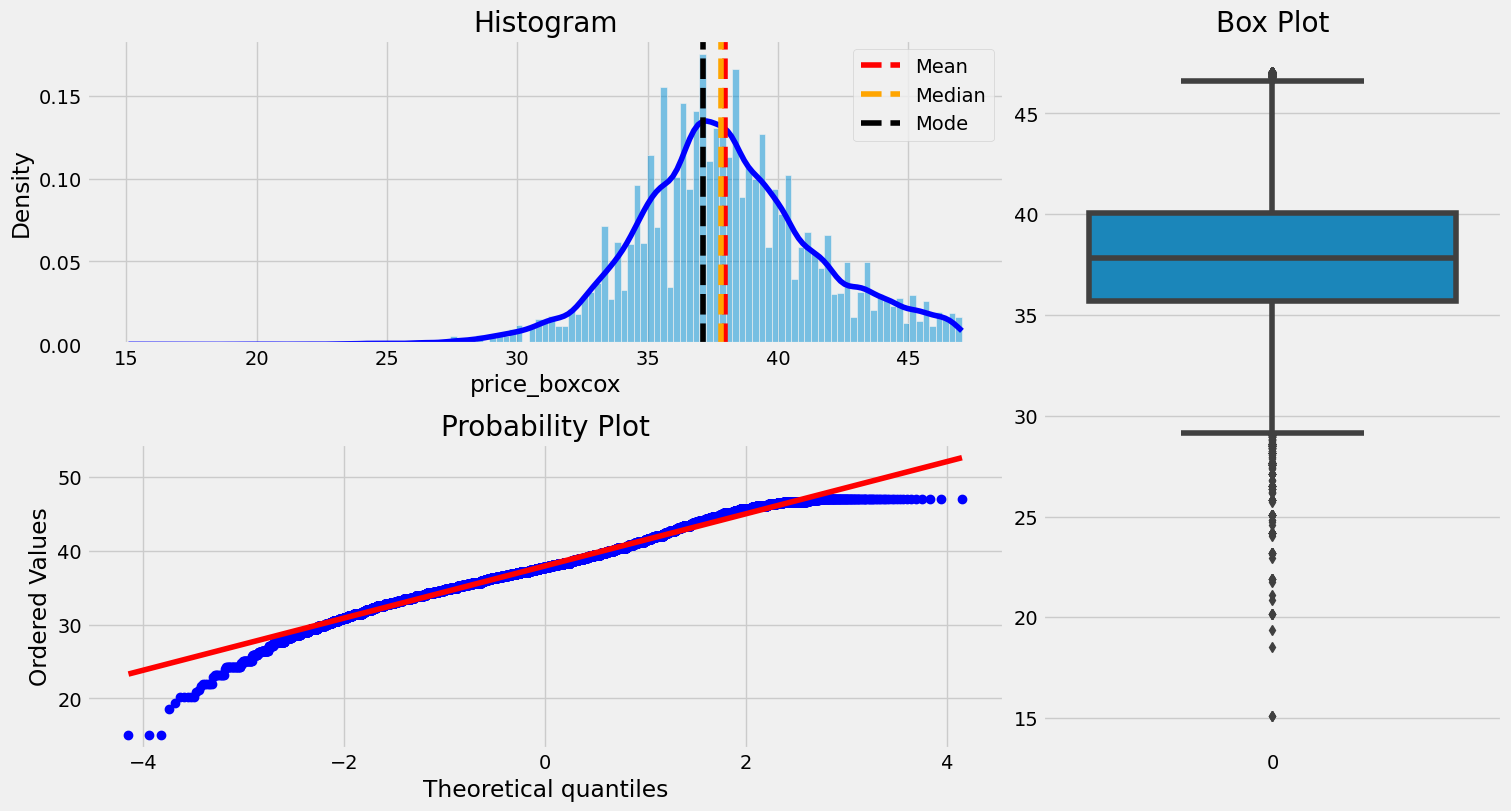

In [35]:
# Apply Boxcox operation to reduce the skrewness
df["price_boxcox"], parameters = stats.boxcox(df["price"])
plotting_3_chart(df, "price_boxcox")
# skewness and kurtosis
print("Skewness: %f" % df["price_boxcox"].skew())
print("Kurtosis: %f" % df["price_boxcox"].kurt())

mean = df["price_boxcox"].mean()
median = df["price_boxcox"].median()
mode = df["price_boxcox"].mode()[0]

mean = round(mean)
median = round(median)
mode = round(mode)

print(f"Mean: {round(mean)} - Median: {round(median)} - Mode: {round(mode)}")

Relation of features to target (price_log)

In [36]:
df.head()

,postal_code,type_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,number_of_facades,swimming_pool,state_of_the_building,city_name,lattitude,longitude,price_boxcox
0,1050,0,340000,6,203,1,0,1,0,95,2,0,to be done up,Ixelles,4.381571,50.822285,39.270064
1,1050,0,520000,4,200,0,0,0,0,69,2,0,to renovate,Ixelles,4.381571,50.822285,42.342639
2,1050,0,599000,4,160,1,0,1,1,100,2,0,to be done up,Ixelles,4.381571,50.822285,43.410470
3,1050,0,599000,3,160,1,0,1,1,130,2,0,good,Ixelles,4.381571,50.822285,43.410470
4,1050,0,575000,3,171,0,0,0,0,46,2,0,just renovated,Ixelles,4.381571,50.822285,43.099360


 List all the types of our data from our dataset and take only the numerical ones.


In [37]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [38]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
df_numeric = df[numeric_cols]
df_numeric.head()

,postal_code,type_of_property,price,number_of_rooms,house_area,fully_equipped_kitchen,open_fire,terrace,garden,surface_of_the_land,number_of_facades,swimming_pool,lattitude,longitude,price_boxcox
0,1050,0,340000,6,203,1,0,1,0,95,2,0,4.381571,50.822285,39.270064
1,1050,0,520000,4,200,0,0,0,0,69,2,0,4.381571,50.822285,42.342639
2,1050,0,599000,4,160,1,0,1,1,100,2,0,4.381571,50.822285,43.410470
3,1050,0,599000,3,160,1,0,1,1,130,2,0,4.381571,50.822285,43.410470
4,1050,0,575000,3,171,0,0,0,0,46,2,0,4.381571,50.822285,43.099360


array([[<Axes: title={'center': 'postal_code'}>,
        <Axes: title={'center': 'type_of_property'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'number_of_rooms'}>],
       [<Axes: title={'center': 'house_area'}>,
        <Axes: title={'center': 'fully_equipped_kitchen'}>,
        <Axes: title={'center': 'open_fire'}>,
        <Axes: title={'center': 'terrace'}>],
       [<Axes: title={'center': 'garden'}>,
        <Axes: title={'center': 'surface_of_the_land'}>,
        <Axes: title={'center': 'number_of_facades'}>,
        <Axes: title={'center': 'swimming_pool'}>],
       [<Axes: title={'center': 'lattitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price_boxcox'}>, <Axes: >]], dtype=object)

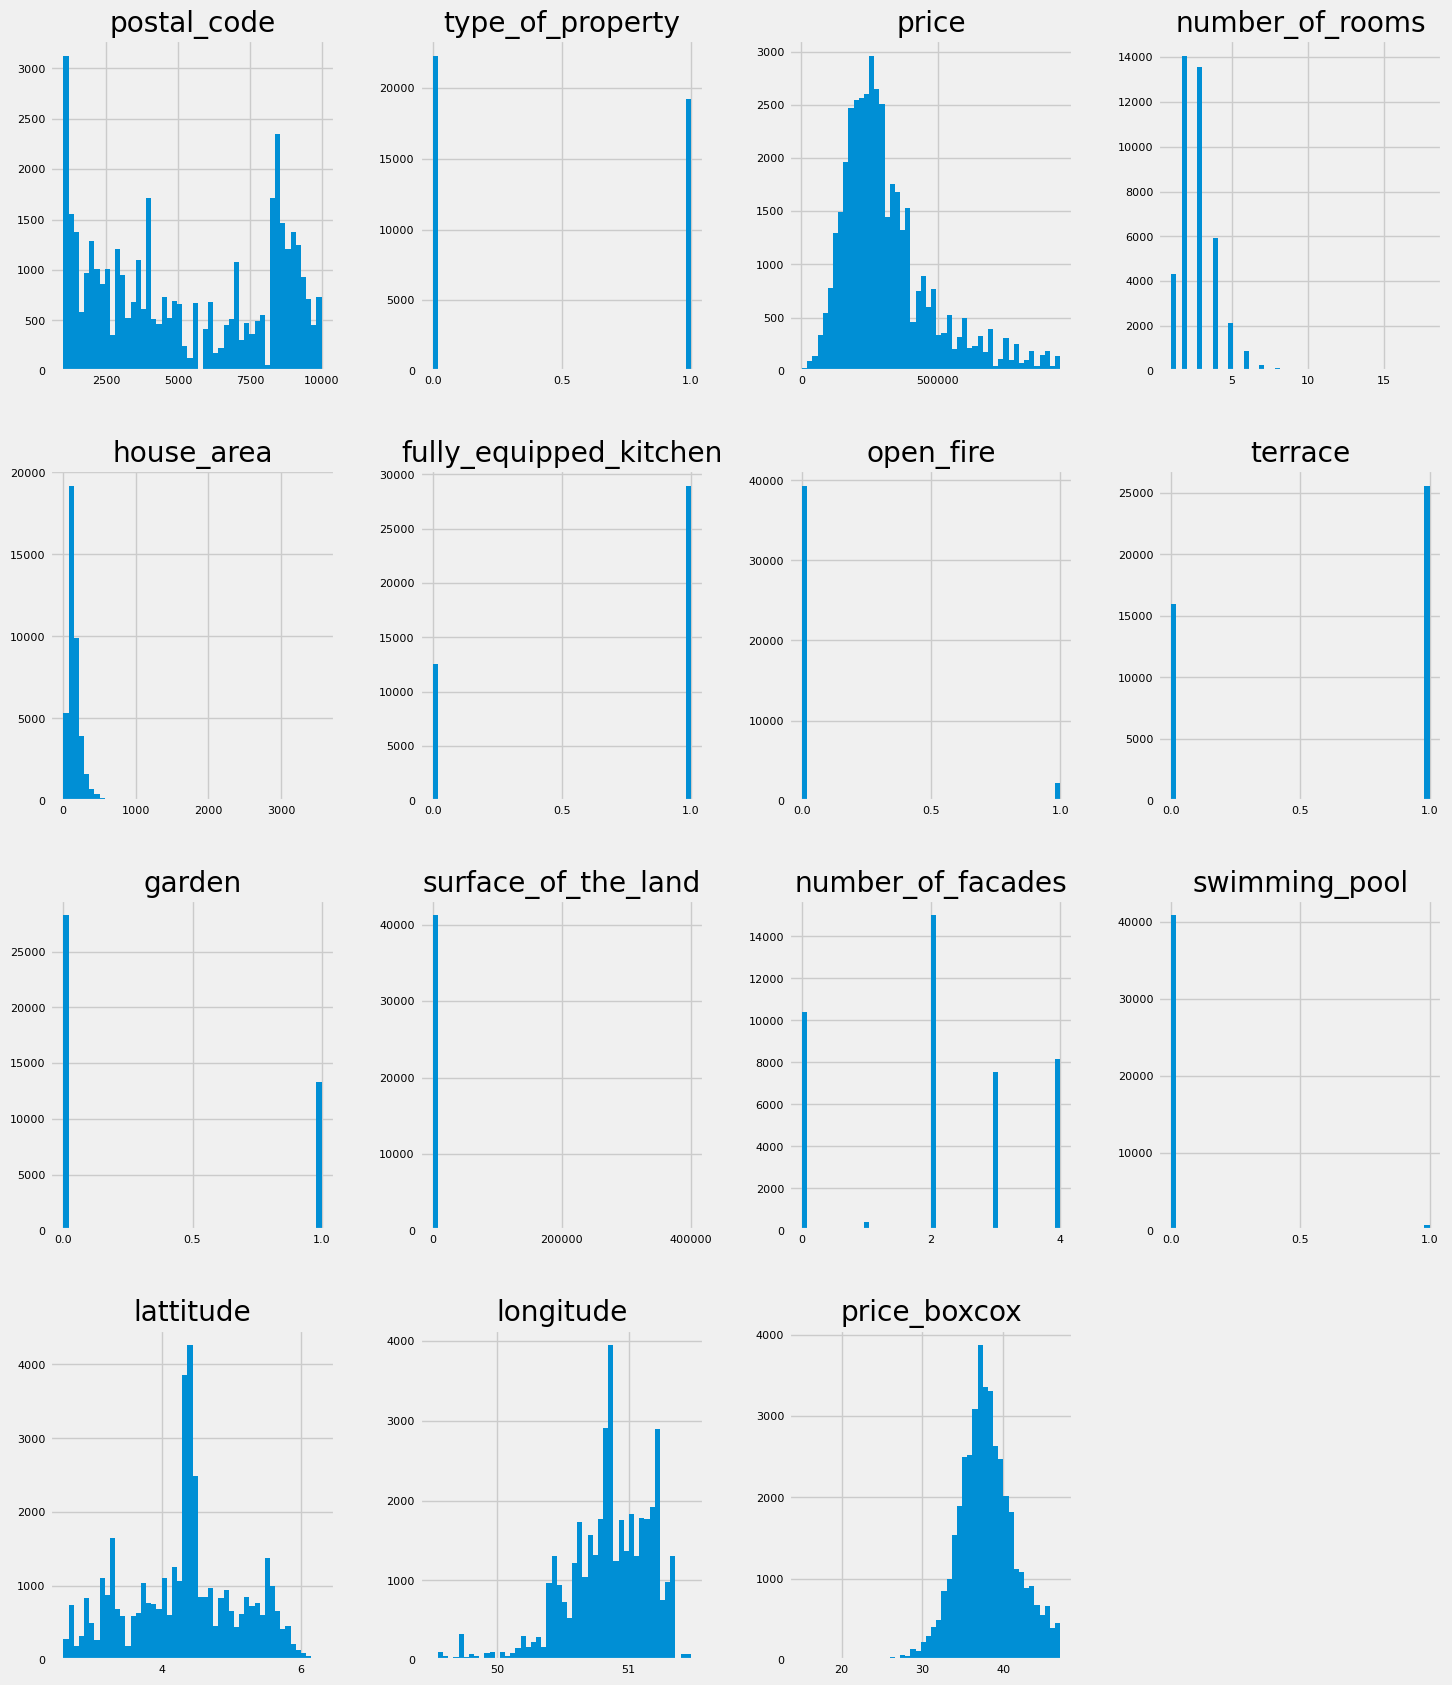

In [39]:
df_numeric.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [41]:
df_num_corr = df_numeric.corr()["price"][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print(
    "There is {} strongly correlated values with price:\n{}".format(
        len(golden_features_list), golden_features_list
    )
)

There is 2 strongly correlated values with price:
price         1.000000
house_area    0.530743
Name: price, dtype: float64


/home/thiphan/anaconda3/envs/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


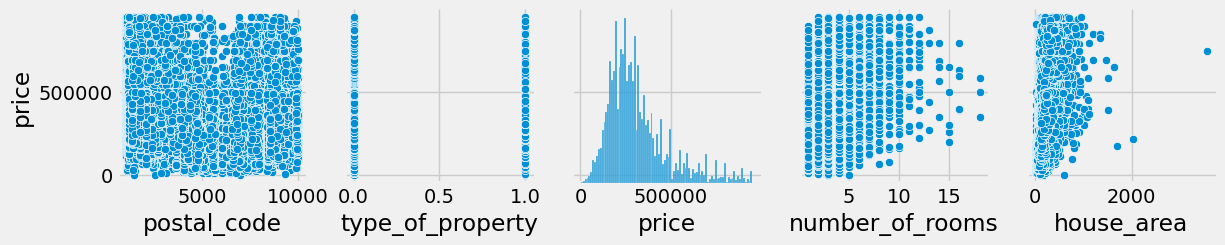

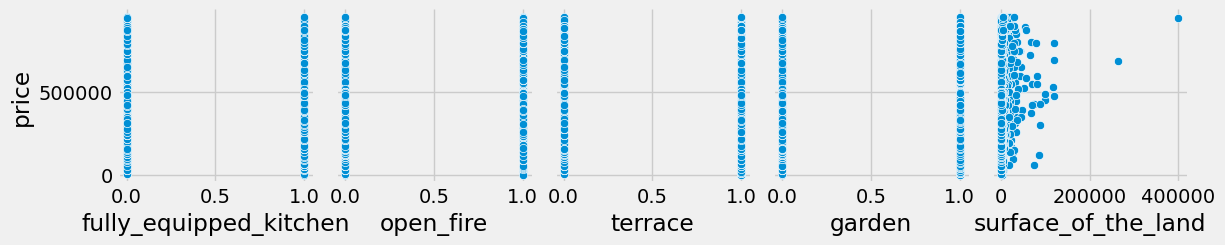

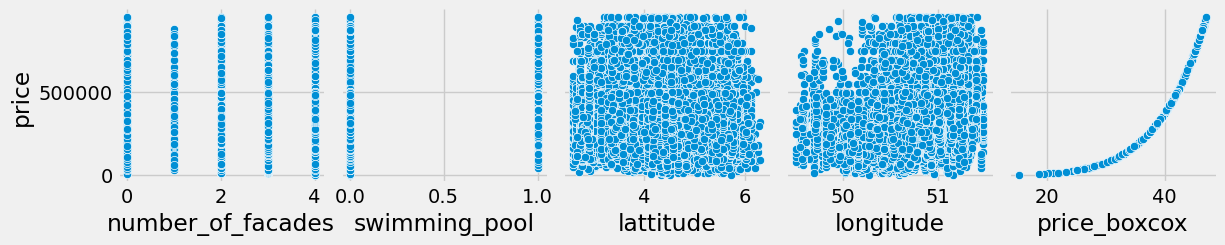

In [14]:
for i in range(0, len(df_numeric.columns), 5):
    sns.pairplot(
        data=df_numeric, x_vars=df_numeric.columns[i : i + 5], y_vars=["price"]
    )

In [15]:
# # quantitative_features_list[:-1] as the last column is SalePrice and we want to keep it
# categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]
# df_categ = df[categorical_features]
# df_categ.head()

In [16]:
categorical_cols = df.select_dtypes(include=["O"]).columns
df_categorical = df[categorical_cols]
df_categorical.head()

,state_of_the_building,city_name
0,to be done up,Ixelles
1,to renovate,Ixelles
2,to be done up,Ixelles
3,good,Ixelles
4,just renovated,Ixelles


/tmp/ipykernel_34522/653687031.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
/tmp/ipykernel_34522/653687031.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)


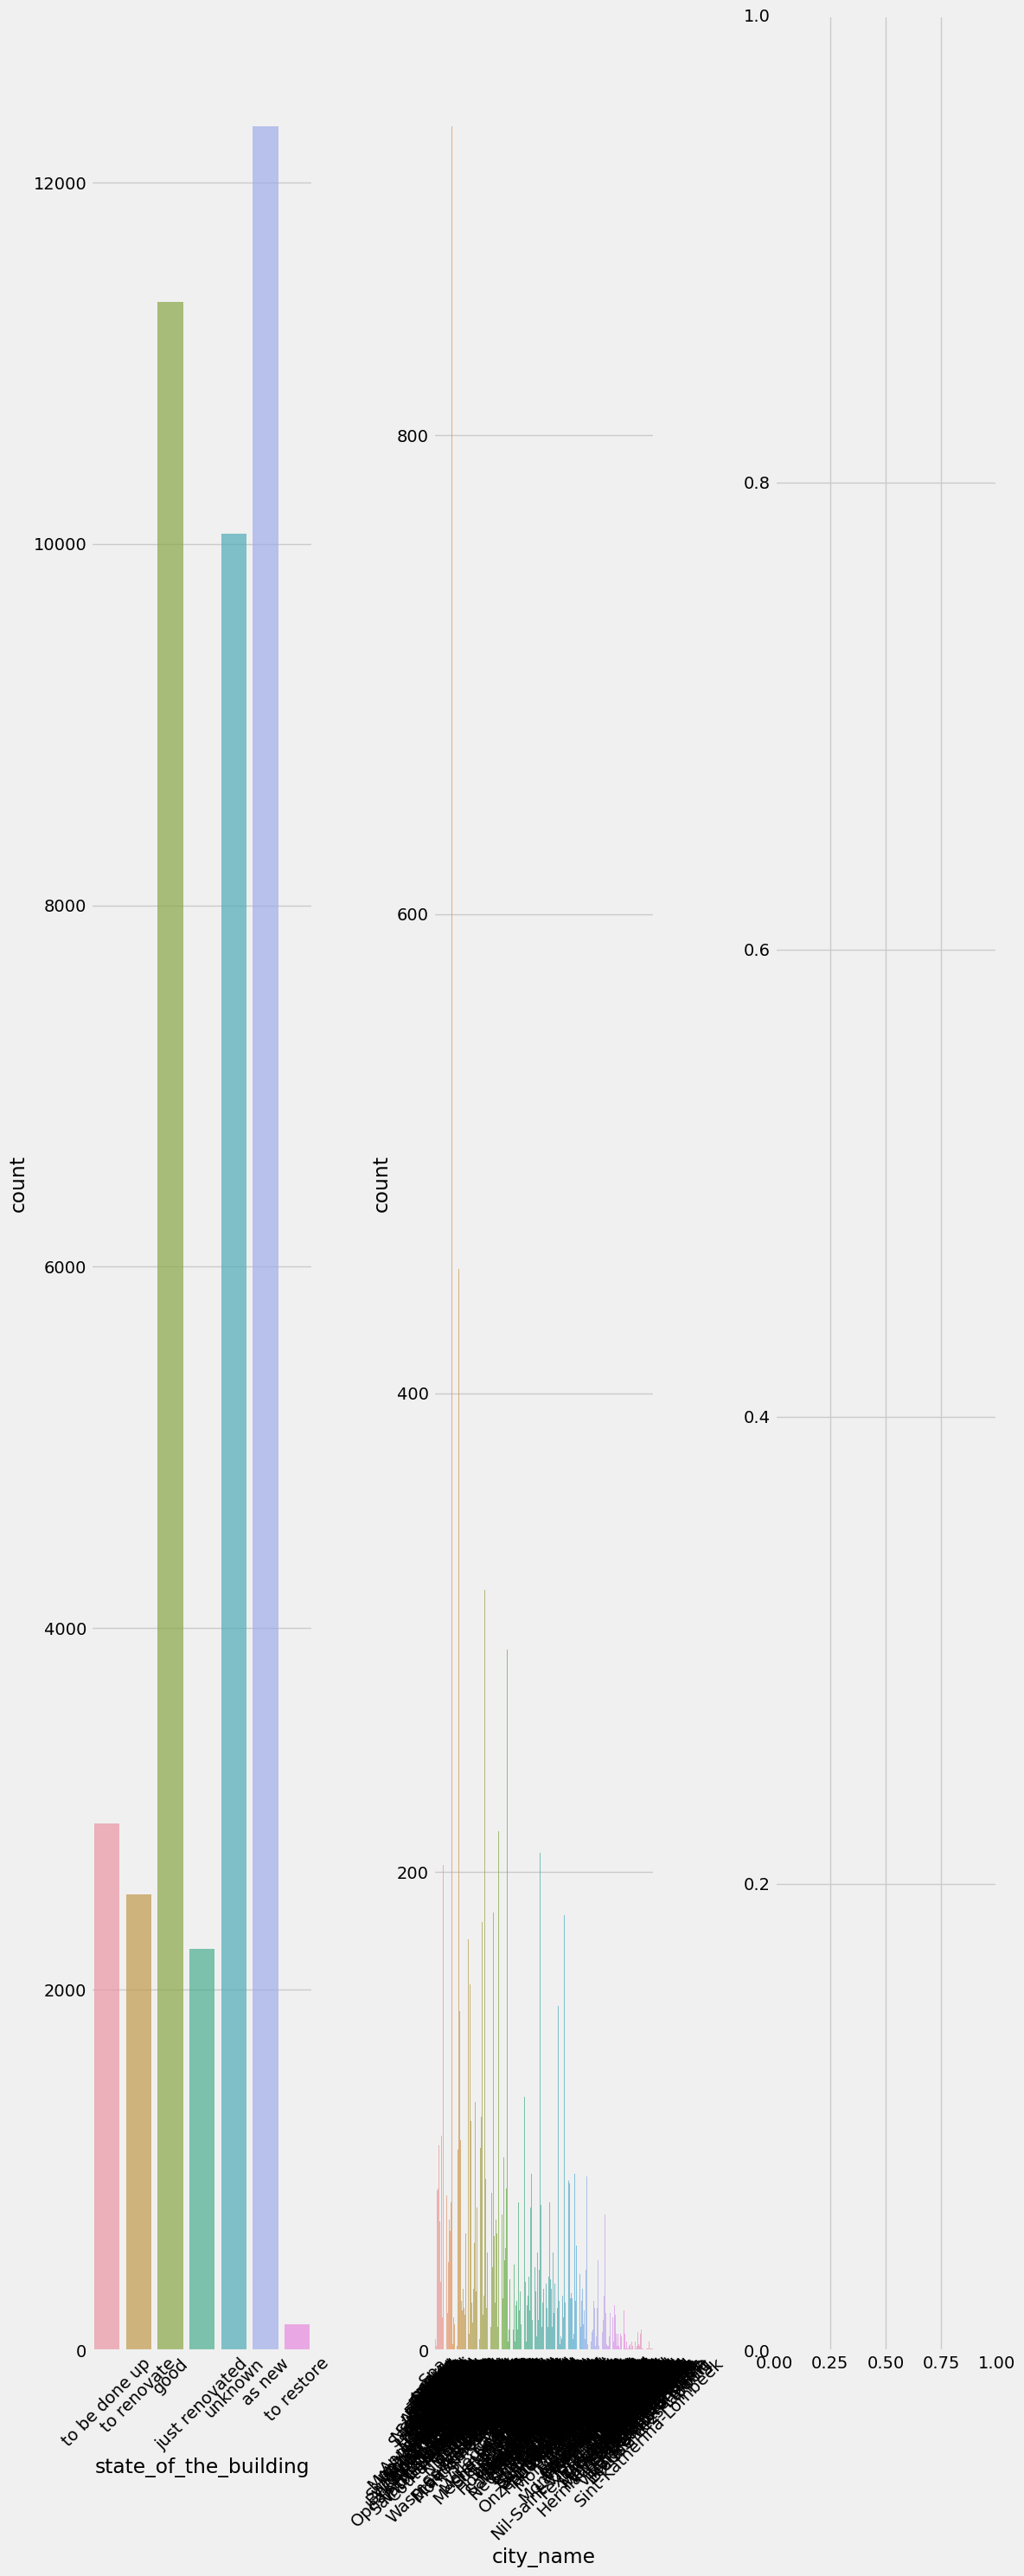

In [17]:
fig, axes = plt.subplots(round(len(df_categorical.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_categorical.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(
            x=df_categorical.columns[i], alpha=0.7, data=df_categorical, ax=ax
        )

fig.tight_layout()

Feature to feature relationship

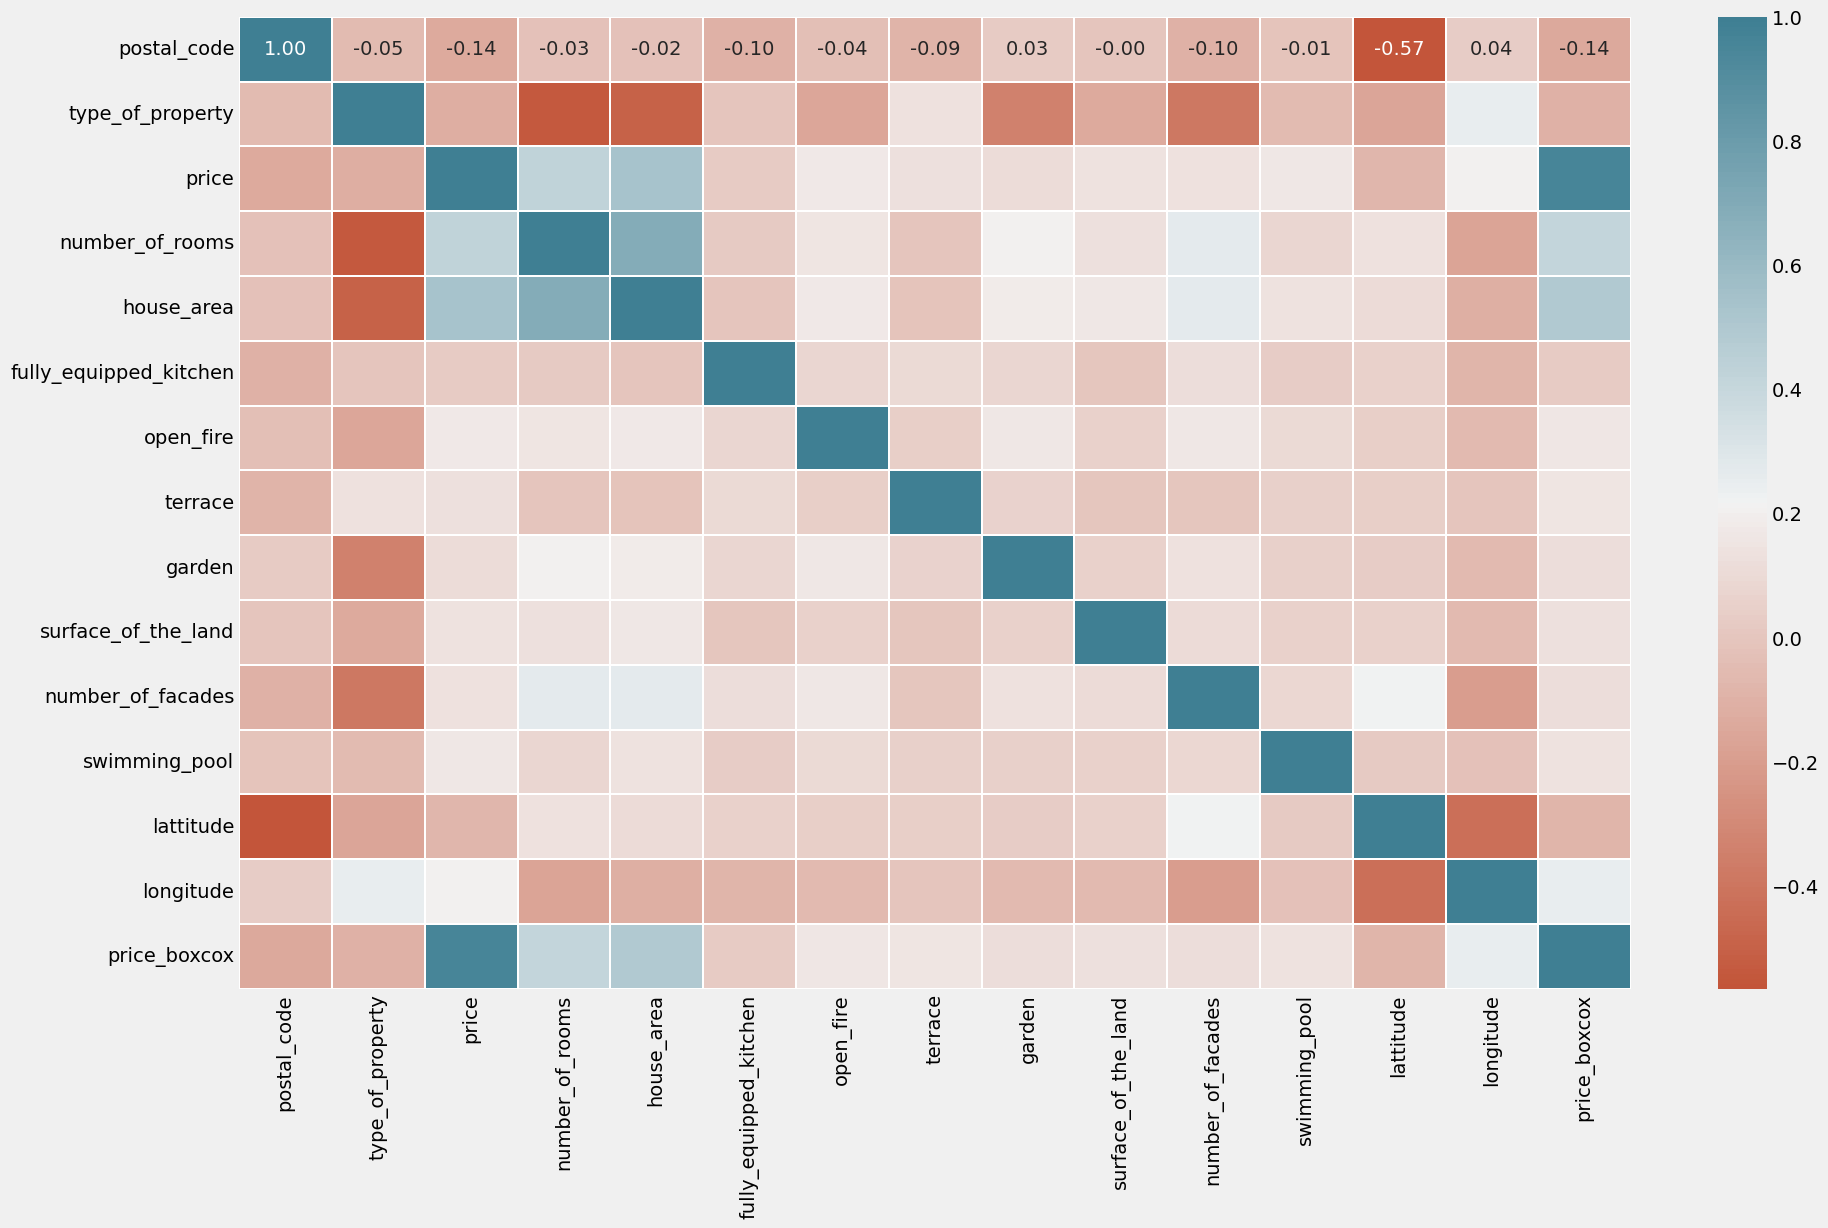

In [18]:
# Create the correlation heatmap
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(
    df_numeric.corr(),
    ax=ax,
    annot=True,
    linewidths=0.05,
    fmt=".2f",
    cmap=sns.diverging_palette(20, 220, n=200),
)
plt.show()

A lot of features seems to be correlated between each other but some of them such as YearBuild/GarageYrBlt may just indicate a price inflation over the years. As for 1stFlrSF/TotalBsmtSF, it is normal that the more the 1st floor is large (considering many houses have only 1 floor), the more the total basement will be large.

Now for the ones which are less obvious we can see that:

There is a strong negative correlation between BsmtUnfSF (Unfinished square feet of basement area) and BsmtFinSF2 (Type 2 finished square feet). There is a definition of unfinished square feet here but as for a house of "Type 2", I can't tell what it really is.
HalfBath/2ndFlrSF is interesting and may indicate that people gives an importance of not having to rush downstairs in case of urgently having to go to the bathroom (I'll consider that when I'll buy myself a house uh...)

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -